# Dark Money

By: Nathan Hodges


# Here is a case that is important

[Buckley_v._Valeo](https://en.wikipedia.org/wiki/Buckley_v._Valeo)

In [26]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as ticker
import numpy as np

In [45]:
col_header = pd.read_csv('D:/Data/PACDataDescription.csv' , usecols = [0,1] , index_col = [0] , nrows = 27 )

#2018 PAC Data from FEC
data = pd.read_csv('D:/Data/PacData/webk18.txt',
                   delimiter = "|",
                   names = col_header.index,
                   parse_dates = ['CVG_END_DT'] )
col_header

,Field name
Column name,
CMTE_ID,Committee identification
CMTE_NM,Committee name
CMTE_TP,Committee type
CMTE_DSGN,Committee designation
CMTE_FILING_FREQ,Committee filing frequency
TTL_RECEIPTS,Total receipts
TRANS_FROM_AFF,Transfers from affiliates
INDV_CONTRIB,Contributions from individuals
OTHER_POL_CMTE_CONTRIB,Contributions from other political committees


In [47]:
directory = os.fsencode('D:/Data/PacData/')

max_receipts = []
min_date = []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    data = pd.read_csv('D:/Data/PacData/' + filename ,
                       delimiter = "|" ,
                       names = col_header.index ,
                       parse_dates = ['CVG_END_DT'])
    
    receipts = data.TTL_RECEIPTS.max()
    date = data.CVG_END_DT.min()
    
    max_receipts.append(receipts)
    min_date.append(date)

dict = {'date': max_date , 'receipts': max_receipts}

df = pd.DataFrame.from_dict(dict)
df = df.set_index('date')
df = df.sort_index()
df.head()

,receipts
date,
1995-01-04,2.333549e+08
1997-01-16,1.361032e+08
1999-01-01,2.460805e+08
2001-01-01,2.024266e+08
2003-01-01,4.043523e+08


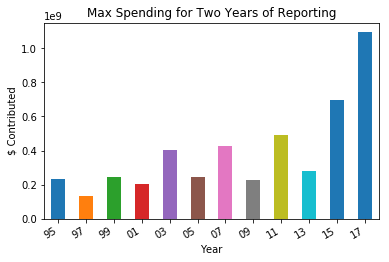

In [53]:
fig, ax = plt.subplots()

ax = df.receipts.plot(kind = 'bar')

ticklabels = [item.strftime('%y') for item in df.index]

ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

# Set common labels
ax.set_xlabel('Year')
ax.set_ylabel('$ Contributed')

ax.set_title('Max Spending for Two Years of Reporting')

plt.gcf().autofmt_xdate()

plt.show(

In [159]:
directory = os.fsencode('D:/Data/PacData/')
frames= []
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    data = pd.read_csv('D:/Data/PacData/' + filename ,
                       delimiter = "|",
                       names = col_header.index,
                       parse_dates = ['CVG_END_DT'])
    
    frames.append(data)

In [168]:
    
result = pd.concat(frames , sort = True )

result = result.set_index('CVG_END_DT')
result = result.sort_index()
result = result.dropna()
#The last 3 rows are for future dates not sure why
result = result.drop(result.index[len(result) - 3 :len(result)])
result.head()

,CAND_CONTRIB,CAND_LOANS,CAND_LOAN_REPAY,CMTE_DSGN,CMTE_FILING_FREQ,CMTE_ID,CMTE_NM,CMTE_TP,COH_BOP,COH_COP,...,NONFED_SHARE_EXP,NONFED_TRANS_RECEIVED,OTHER_POL_CMTE_CONTRIB,OTHER_POL_CMTE_REFUNDS,PTY_COORD_EXP,TRANF_TO_AFF,TRANS_FROM_AFF,TTL_DISB,TTL_LOANS_RECEIVED,TTL_RECEIPTS
CVG_END_DT,,,,,,,,,,,,,,,,,,,,,
1995-01-04,0.0,0.0,0.0,U,T,C00100297,TEXAS COMMERCE DALLAS COUNTY FUND,Q,12725.0,0.0,...,0.0,0.0,0.0,0.0,0.0,12725.0,0.0,12725.0,0.0,0.0
1995-01-05,0.0,0.0,0.0,U,T,C00092817,HIPAC HOLIDAY INNS INC POLITICAL ACTION COMMITTEE,Q,2120.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2120.0,0.0,0.0
1995-01-06,0.0,0.0,0.0,U,T,C00246777,PHYSICIAN SALES & SERVICE INC PSS PAC,N,4657.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4657.0,0.0,0.0
1995-01-09,0.0,0.0,0.0,U,T,C00237701,EMERALD HOMES INC FEDERAL PAC,N,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995-01-10,0.0,0.0,0.0,U,T,C00149781,TEXAS COMMERCE BANK-BEAUMONT-POLITICAL ACTION ...,Q,2967.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2967.0,0.0,2967.0,0.0,0.0


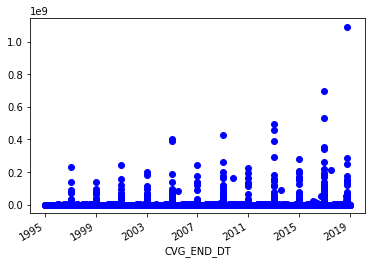

In [169]:
result.TTL_RECEIPTS.plot(style = 'ob')
plt.show()